In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import pickle as pkl

import community as louvain
from networkx.algorithms.community import girvan_newman

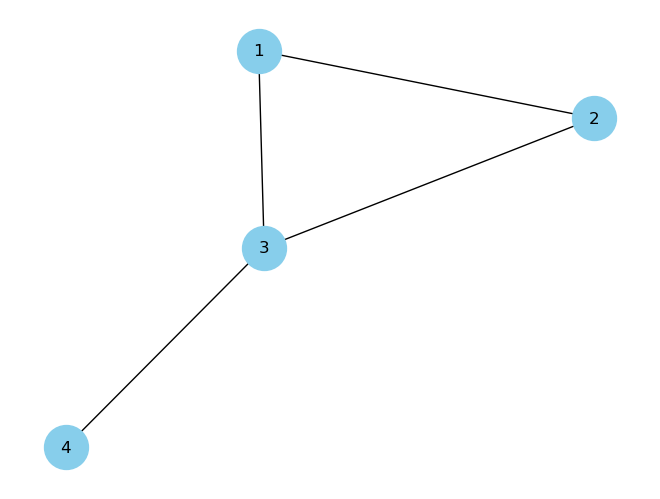

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 4)

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=12)

# Display the graph
plt.show()


In [21]:
def detect_communities(g, method):
    if isinstance(g, nx.DiGraph):
      g = nx.Graph(g)


    if method == 'girvan-newman':
      communities_generator = girvan_newman(g)
      print(communities_generator)
      communities = []
      for community in communities_generator:
        print(community)
        communities.append([list(c) for c in community])

      total_modularity = 0
      for i in range(len(communities)):
        modularity = nx.algorithms.community.modularity(g, communities[i])
        total_modularity += modularity

      total_modularity /= len(communities)
      return communities, total_modularity

    elif method == 'louvain':
      louvain_community = louvain.best_partition(g)
      print(louvain_community)
      communities = [[] for _ in range(max(louvain_community.values()) + 1)]
      for node, community_id in louvain_community.items():
          communities[community_id].append(node)

      modularity = nx.algorithms.community.modularity(g, communities)
      return communities, modularity

    else:
      print('Entered an invalid method')
      return None

In [14]:
communities_girvan, modularities = detect_communities(G, method='girvan-newman')

<generator object girvan_newman at 0x000001EB9C7863E0>
({1, 2, 3}, {4})
({1}, {2, 3}, {4})
({1}, {2}, {3}, {4})


In [24]:
communities_girvan

[[[1, 2, 3], [4]], [[1], [2, 3], [4]], [[1], [2], [3], [4]]]

In [22]:
communities_louvain, modularities = detect_communities(G, method='louvain')

{1: 1, 2: 1, 3: 0, 4: 0}


In [23]:
communities_louvain

[[3, 4], [1, 2]]